In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import kagglehub
import torch
import scipy
import sklearn

In [6]:
complaints_path = kagglehub.dataset_download("adelanseur/insurance-company-complaints")
print(complaints_path)

C:\Users\adhit\.cache\kagglehub\datasets\adelanseur\insurance-company-complaints\versions\1


Avg Duration 41.12280701754386


C:\Users\adhit\AppData\Local\Temp\ipykernel_31168\188045550.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = complaints_df[complaints_df['Coverage'] == 'Individual Life'][complaints_df['Recovery'] > 0]


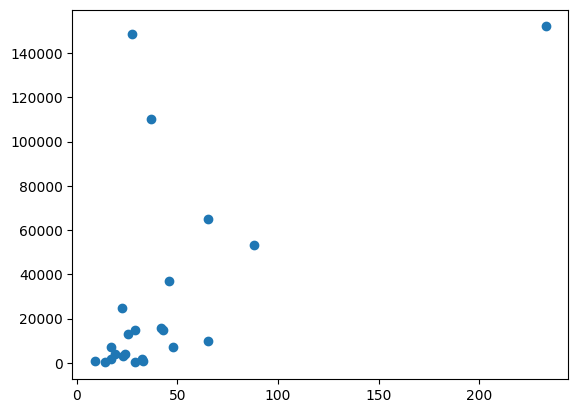

In [7]:
complaints_df = pd.read_csv('data/complaints.csv')
# print(complaints_df.head())

df = complaints_df[complaints_df['Coverage'] == 'Individual Life'][complaints_df['Recovery'] > 0]
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['duration'] = df['Closed'] - df['Opened']
df['duration_seconds'] = df['duration'].dt.total_seconds()
df['duration_minutes'] = df['duration'].dt.total_seconds() / 60
df['duration_days'] = df['duration'].dt.days
print('Avg Duration', df['duration_days'].mean())
grouped = df.groupby('Company')

avg_recovery = grouped['Recovery'].mean().to_dict()
avg_duration = grouped['duration_days'].mean().to_dict()
fig, ax = plt.subplots()
ax.scatter(avg_duration.values(), avg_recovery.values())
# for company in avg_recovery:
#     ax.annotate(company, (avg_recovery[company], avg_duration[company]))


In [8]:
class LinearRegressionModel(torch.nn.Module):
 
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

epoch 0, loss 1817.7564697265625
epoch 1, loss 1814.77783203125
epoch 2, loss 1811.807861328125
epoch 3, loss 1808.8450927734375
epoch 4, loss 1805.8914794921875
epoch 5, loss 1802.9456787109375
epoch 6, loss 1800.008544921875
epoch 7, loss 1797.0804443359375
epoch 8, loss 1794.160888671875
epoch 9, loss 1791.2503662109375
epoch 10, loss 1788.348876953125
epoch 11, loss 1785.45654296875
epoch 12, loss 1782.5732421875
epoch 13, loss 1779.69970703125
epoch 14, loss 1776.83544921875
epoch 15, loss 1773.9808349609375
epoch 16, loss 1771.1357421875
epoch 17, loss 1768.3006591796875
epoch 18, loss 1765.475341796875
epoch 19, loss 1762.6597900390625
epoch 20, loss 1759.854248046875
epoch 21, loss 1757.0589599609375
epoch 22, loss 1754.27392578125
epoch 23, loss 1751.4990234375
epoch 24, loss 1748.7342529296875
epoch 25, loss 1745.979736328125
epoch 26, loss 1743.235595703125
epoch 27, loss 1740.5023193359375
epoch 28, loss 1737.7791748046875
epoch 29, loss 1735.06640625
epoch 30, loss 1732.36

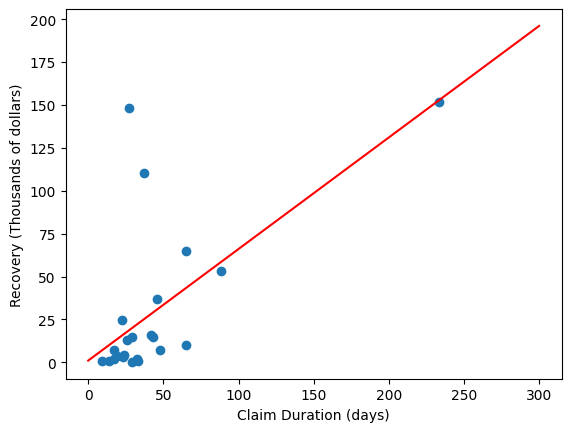

In [9]:
model = LinearRegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

X = torch.from_numpy(np.float32(grouped['duration_days'].mean().to_numpy().reshape((-1, 1))))
Y = torch.from_numpy(np.float32(grouped['Recovery'].mean().to_numpy().reshape((-1, 1)))) / 1000

for epoch in range(1000):
    pred_y = model(X)
    loss = criterion(pred_y, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

with torch.no_grad():
    pred_in = torch.from_numpy(np.float32(np.arange(0, 300, 0.1).reshape((-1, 1))))
    pred_out = model(pred_in).data
    print('Weights:', list(model.parameters()))
    fig, ax = plt.subplots()
    ax.scatter(x=X.detach().numpy().reshape((-1)), y=Y.detach().numpy().reshape((-1)))
    ax.set_xlabel('Claim Duration (days)')
    ax.set_ylabel('Recovery (Thousands of dollars)')
    ax.add_line(plt.Line2D(pred_in.detach().numpy().reshape(-1), pred_out.numpy().reshape(-1), color='red'))

Slope: 629.4341968469366
Intercept: 2979.074601206663
R-squared: 0.38563939902865324
P-value: 0.001565518168741658
Standard Error: 173.36509680443834


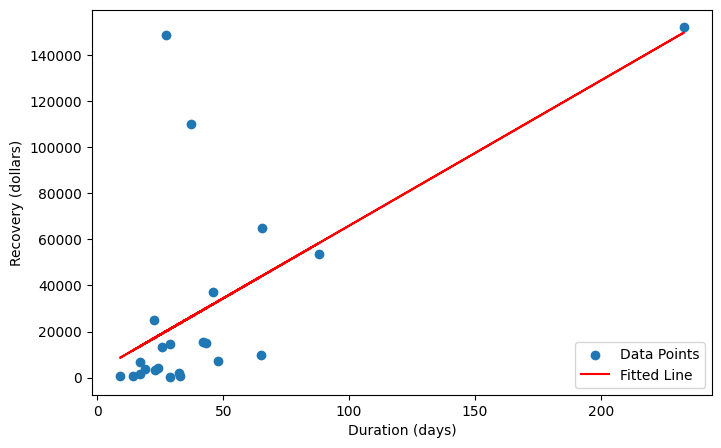

In [10]:
import sklearn.linear_model


X = grouped['duration_days'].mean().to_numpy()
Y = grouped['Recovery'].mean().to_numpy()

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X, Y)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

predicted_Y = slope * X + intercept

plt.figure(figsize=(8, 5))
plt.scatter(X, Y, label='Data Points')
plt.plot(X, predicted_Y, color='red', label='Fitted Line')
plt.xlabel('Duration (days)')
plt.ylabel('Recovery (dollars)')
plt.legend()
plt.show()

Weights: [[629.43419685]]
Intercecpt: [2979.07460121]
R-squared: 0.3856393990286534


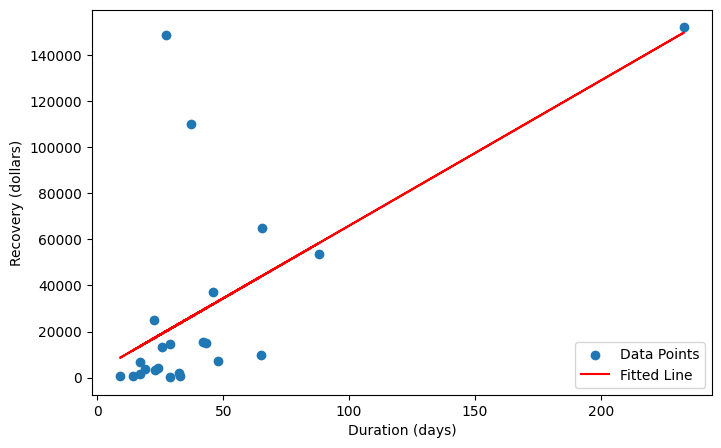

In [11]:
X = grouped['duration_days'].mean().to_numpy().reshape(-1, 1)
Y = grouped['Recovery'].mean().to_numpy().reshape(-1, 1)

linear = sklearn.linear_model.LinearRegression().fit(X, Y)

print(f"Weights: {linear.coef_}")
print(f"Intercecpt: {linear.intercept_}")
print(f"R-squared: {linear.score(X, Y)}")

predicted_Y = slope * X + intercept

plt.figure(figsize=(8, 5))
plt.scatter(X, Y, label='Data Points')
plt.plot(X, predicted_Y, color='red', label='Fitted Line')
plt.xlabel('Duration (days)')
plt.ylabel('Recovery (dollars)')
plt.legend()
plt.show()